[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]
1.0


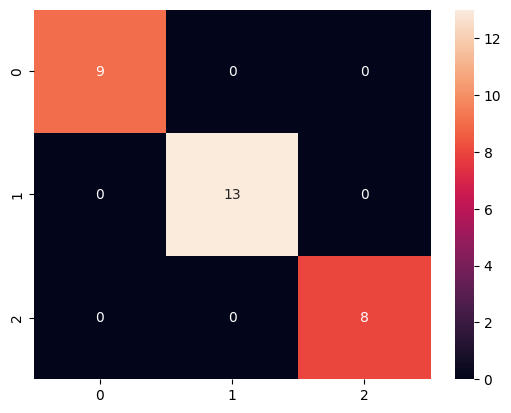

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from collections import Counter

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

k=3
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance
def predict(X):
        predictions = [_predict(x) for x in X]
        return predictions

def _predict(x):
        # compute the distance
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    
        # get the closest k
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]

        # majority voye
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]
predictions = predict(X_test)
print(predictions)
cm = confusion_matrix(y_test, predictions)
print(cm)
sns.heatmap(cm,annot=True)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)



In [4]:
#using built in functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predictions1=knn.predict(X_test)
cm = confusion_matrix(y_test, predictions1)
print(cm)

accuracy1=accuracy_score(y_test,predictions1)
print(accuracy1)

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]
1.0
